# PCA- Basic Summary

Principal component analysis is used to extract the important information from a multivariate data table and to express this information as a set of few new variables called principal components. These new variables correspond to a linear combination of the originals. The number of principal components is less than or equal to the number of original variables.

The information in a given data set corresponds to the total variation it contains. The goal of PCA is to identify directions (or principal components) along which the variation in the data is maximal.

In other words, PCA reduces the dimensionality of a multivariate data to two or three principal components, that can be visualized graphically, with minimal loss of information.

PCA assumes that the directions with the largest variances are the most “important” (i.e, the most principal).

The amount of variance retained by each principal component is measured by the so-called eigenvalue.

The PCA method is particularly useful when the variables within the data set are highly correlated.

Correlation indicates that there is redundancy in the data. 

Due to this redundancy, PCA can be used to reduce the original variables into a smaller number of new variables ( = principal components) explaining most of the variance in the original variables.

Taken together, the main purpose of principal component analysis is to:

* identify hidden pattern in a data set,

* reduce the dimensionnality of the data by removing the noise and redundancy in the data,

* identify correlated variables

In [4]:
install.packages('FactoMineR')
install.packages('factoextra')
library(FactoMineR)
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’, ‘car’, ‘flashClust’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rstatix’, ‘ggpubr’


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



**Below we will analyze Decathlon atheletes and their correponding features for PCA**

In [5]:
decathlon <- read.csv('../input/decathlon/decathlon.csv')

head(decathlon)

,X,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
2,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
3,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
4,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
5,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
6,WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar


In [7]:
library(tidyverse)
dec <- decathlon %>% select(-c(X,Competition))

# Data Standardization

In principal component analysis, variables are often scaled (i.e. standardized). This is particularly recommended when variables are measured in different scales (e.g: kilograms, kilometers, centimeters); otherwise, the PCA outputs obtained will be severely affected.

The goal is to make the variables comparable. Generally variables are scaled to have 

i) standard deviation one 

ii) mean zero.

In [8]:
res_pca <- PCA(dec,graph = FALSE)

print(res_pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 41 individuals, described by 12 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

In [11]:
summary(res_pca)


Call:
PCA(X = dec, graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               4.759   1.740   1.415   1.132   0.862   0.607   0.510
% of var.             39.657  14.501  11.791   9.431   7.183   5.061   4.254
Cumulative % of var.  39.657  54.158  65.949  75.380  82.563  87.624  91.878
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12
Variance               0.411   0.235   0.187   0.141   0.000
% of var.              3.426   1.960   1.561   1.175   0.000
Cumulative % of var.  95.303  97.264  98.825 100.000 100.000

Individuals (the 10 first)
                 Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3
1            |  2.833 |  1.505  1.161  0.282 |  0.704  0.694  0.062 |  0.942
2            |  3.754 |  1.557  1.243  0.172 |  0.555  0.432  0.022 |  2.189
3            |  3.602 |  1.600  1.312  0.197 |  0.463  0.300  0.016 |  2.057
4            |  2.957 |  0.082  0.003  0.001 | -0.978  1.340  

**Eigenvalues /Variances
the eigenvalues measure the amount of variation retained by each principal component. Eigenvalues are large for the first PCs and small for the subsequent PCs. That is, the first PCs corresponds to the directions with the maximum amount of variation in the data set.**

# Eigenvalues

In [12]:
eig_val <- get_eigenvalue(res_pca)

eig_val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,4.758790e+00,3.965659e+01,39.65659
Dim.2,1.740146e+00,1.450122e+01,54.15780
Dim.3,1.414902e+00,1.179085e+01,65.94866
Dim.4,1.131778e+00,9.431483e+00,75.38014
Dim.5,8.619423e-01,7.182852e+00,82.56299
Dim.6,6.073189e-01,5.060991e+00,87.62398
Dim.7,5.104506e-01,4.253755e+00,91.87774
Dim.8,4.110845e-01,3.425704e+00,95.30344
Dim.9,2.352087e-01,1.960072e+00,97.26351
Dim.10,1.873636e-01,1.561364e+00,98.82488


The proportion of variation explained by each eigenvalue is given in the second column. For example, 4.75 divided by 12 equals 0.39, or, about 39.65% of the variation is explained by this first eigenvalue. 

The cumulative percentage explained is obtained by adding the successive proportions of variation explained to obtain the running total. For instance, 39.65% plus 14.50% equals 54.17%, and so forth. Therefore, about 54.17% of the variation is explained by the first two eigenvalues together.

An eigenvalue > 1 indicates that PCs account for more variance than accounted by one of the original variables in standardized data. This is commonly used as a cutoff point for which PCs are retained. This holds true only when the data is standardised

You can also limit the number of component to that number that accounts for a certain fraction of the total variance. For example, if you are satisfied with 70% of the total variance explained then use the number of components to achieve that.

In our analysis, the first four principal components explain 75% of the variation. This is an acceptably large percentage.

We can also create a scree plot

In [ ]:
fviz_eig( res_pca, addlabels = TRUE, ylim = c( 0, 50)) 

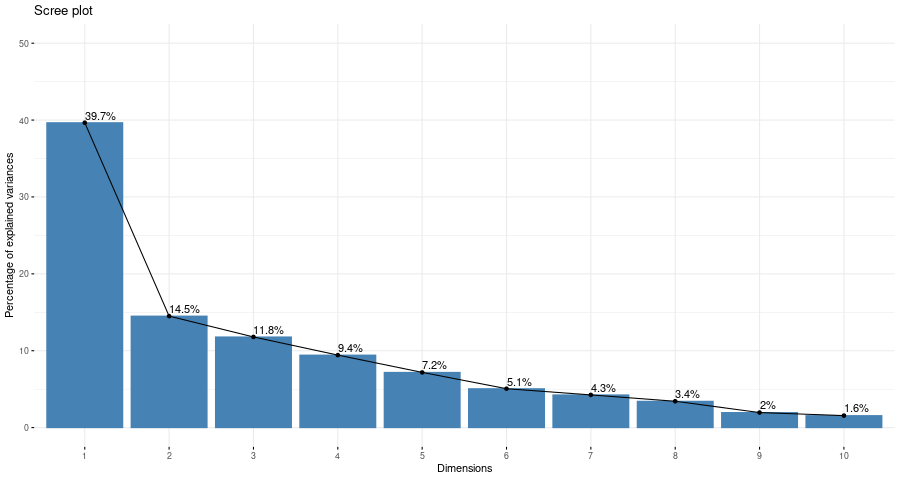

From the plot above, we might want to stop at the 6th principal component. 87% of the information (variances) contained in the data are retained by the first five principal components.

A simple method to extract the results, for variables, from a PCA output is to use the function get_pca_var() [factoextra package].

This function provides a list of matrices containing all the results for the active variables (coordinates, correlation between variables and axes, squared cosine and contributions)

In [9]:
var <- get_pca_var(res_pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

**The correlation between a variable and a principal component is used as the coordinate of the variable on the PC.**

In [16]:
head(var$coord,4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,-0.7081629,0.1576287,-0.15438506,0.206049535,0.51408310
Long.jump,0.7559094,-0.3329181,0.18223996,0.007219957,-0.04747772
Shot.put,0.6116490,0.6122609,-0.01992738,0.109366452,-0.07290452
High.jump,0.5878896,0.3597240,-0.23912699,-0.086588690,0.40300390


To plot the variables in the top two dimension

In [ ]:
fviz_pca_var( res_pca, col.var = "black")

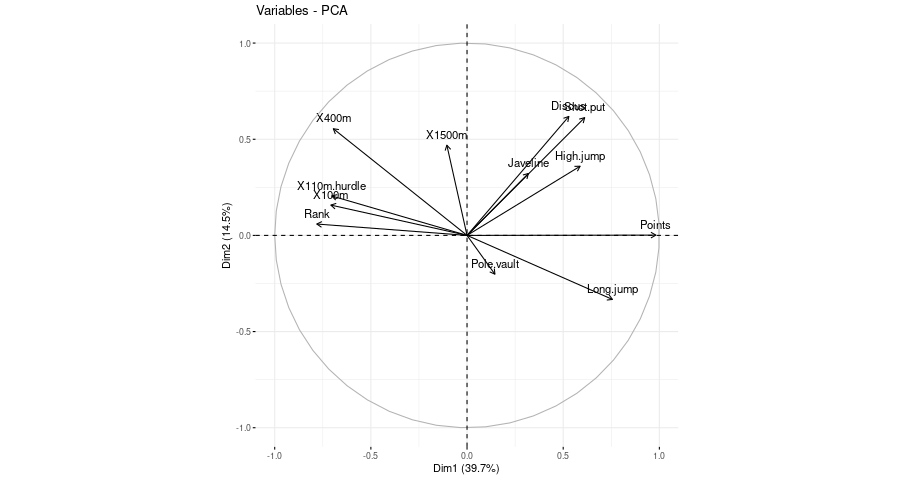

The above plot is **variable correlation plots**. It shows the relationships between all variables. It can be interpreted as follow:

* Positively correlated variables are grouped together.

* Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).

* The distance between variables and the origin measures the quality of the variables on the factor map.

* Variables that are away from the origin are well represented on the factor map.

# Quality of Representation

**The quality of representation of the variables on factor map is called cos2** (square cosine, squared coordinates)

In [18]:
head(var$cos2,4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,0.5014947,0.02484679,0.0238347454,4.245641e-02,0.264281435
Long.jump,0.5713990,0.11083443,0.0332114038,5.212778e-05,0.002254133
Shot.put,0.3741145,0.37486336,0.0003971003,1.196102e-02,0.005315068
High.jump,0.3456141,0.12940137,0.0571817192,7.497601e-03,0.162412145


In [11]:
library(corrplot)
library(GGally)

corrplot 0.92 loaded

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



**Correlation Plot**

In [ ]:
corrplot(var$cos2,is.corr=FALSE)

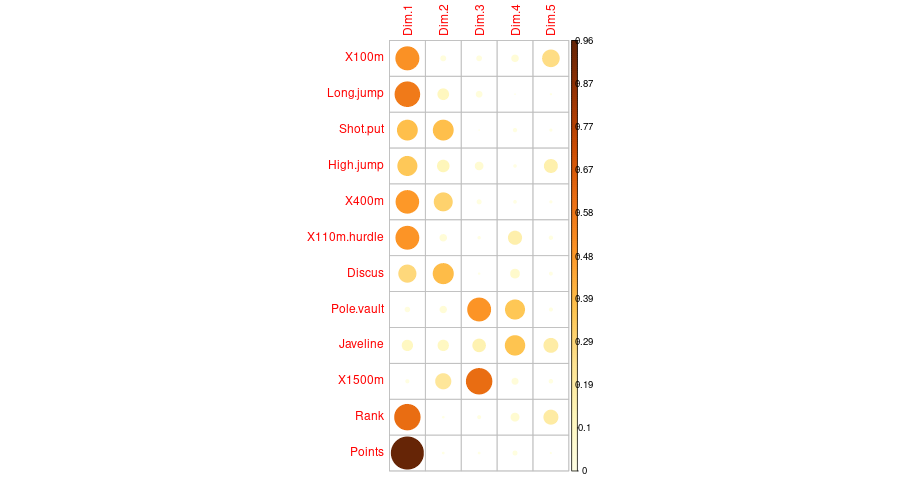

In [ ]:
ggcorr(var$cos2, palette = "RdBu", label = TRUE)

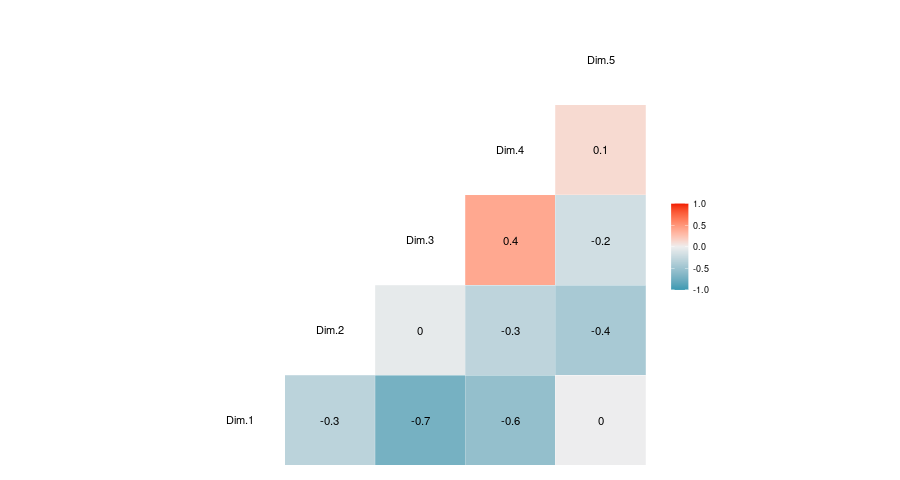

**Bar plot visualization**

In [ ]:
#Total cos2 of variables on Dim. 1 and Dim. 2
fviz_cos2( res_pca, choice = "var", axes = 1: 2)

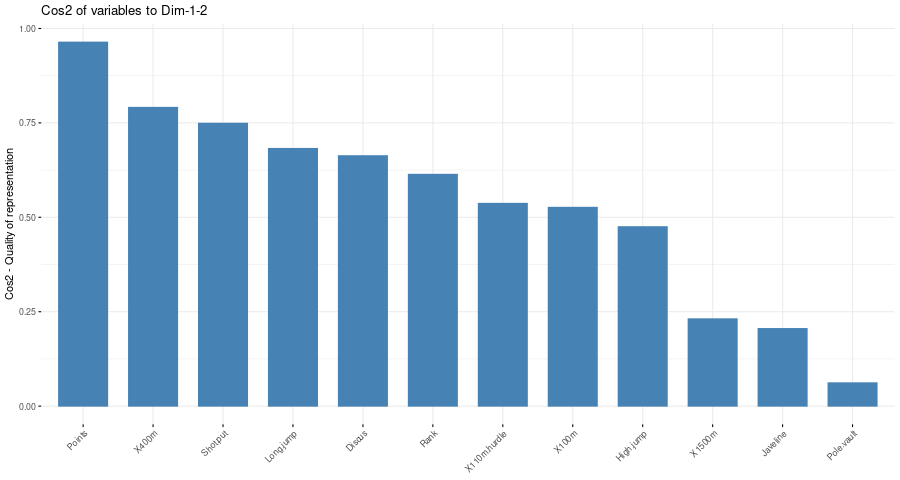

A high cos2 indicates a good representation of the variable on the principal component. In this case the variable is positioned close to the circumference of the correlation circle.

A low cos2 indicates that the variable is not perfectly represented

It’s possible to color variables by their cos2 values using the argument col.var = “cos2”. This produces a gradient colors. In this case, the argument gradient.cols can be used to provide a custom color. For instance, gradient.cols = c(" white“,”blue“,”red“) means that: variables with low cos2 values will be colored in”white" variables with mid cos2 values will be colored in “blue” variables with high cos2 values will be colored in red

For a given variable, the sum of the cos2 on all the principal components is equal to one.

If a variable is perfectly represented by only two principal components (Dim.1 & Dim.2), the sum of the cos2 on these two PCs is equal to one. In this case the variables will be positioned on the circle of correlations.

For some of the variables, more than 2 components might be required to perfectly represent the data. In this case the variables are positioned inside the circle of correlations.

In [ ]:
# Color by cos2 values: quality on the factor map 
fviz_pca_var(res_pca, col.var = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping 
             )

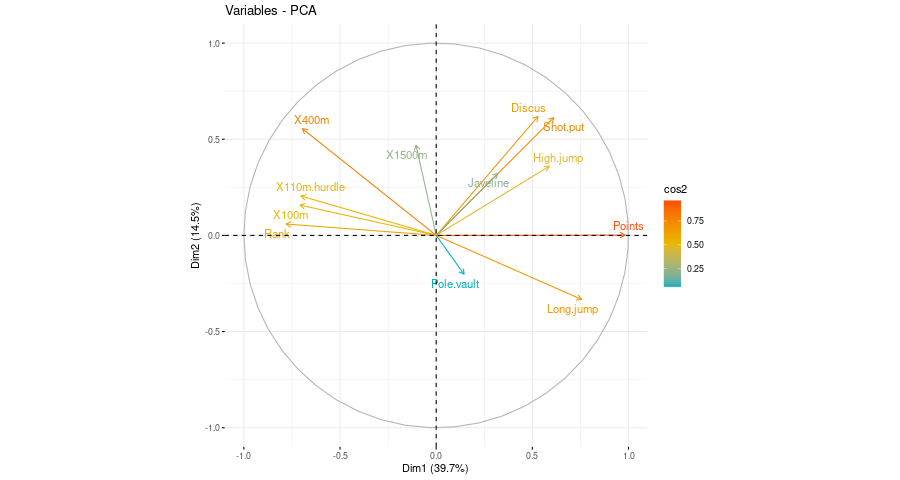

* variables with low cos2 values will be colored in “white”

* variables with mid cos2 values will be colored in “blue”

* variables with high cos2 values will be colored in red

# Contributions of variables to PCs

The contributions of variables in accounting for the variability in a given principal component are expressed in percentage.

Variables that are correlated with PC1 (i.e., Dim.1) and PC2 (i.e., Dim.2) are the most important in explaining the variability in the data set.

Variables that do not correlated with any PC or correlated with the last dimensions are variables with low contribution and might be removed to simplify the overall analysis.

The contribution of variables can be extracted as follow :

In [22]:
head(var$contrib,10)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,10.5382802,1.427857,1.68455054,3.751302060,30.6611523
Long.jump,12.0072309,6.369260,2.34725764,0.004605831,0.2615179
Shot.put,7.8615458,21.542062,0.02806556,1.056834544,0.6166385
High.jump,7.2626467,7.436236,4.04138977,0.662462192,18.8425779
X400m,10.1582977,17.675417,1.22207996,0.695168032,0.6447135
X110m.hurdle,10.3979678,2.415117,0.46428810,14.767777108,1.4438507
Discus,5.8889946,21.994680,0.21097770,6.593926298,1.0997592
Pole.vault,0.4408398,2.336074,35.05034400,30.656386097,1.2009404
Javeline,2.1378946,5.955215,10.77628204,31.667171084,21.5978461
X1500m,0.2312995,12.647165,43.19875598,3.209553198,1.5257759


In [ ]:
corrplot(var$contrib, is.corr=FALSE)   

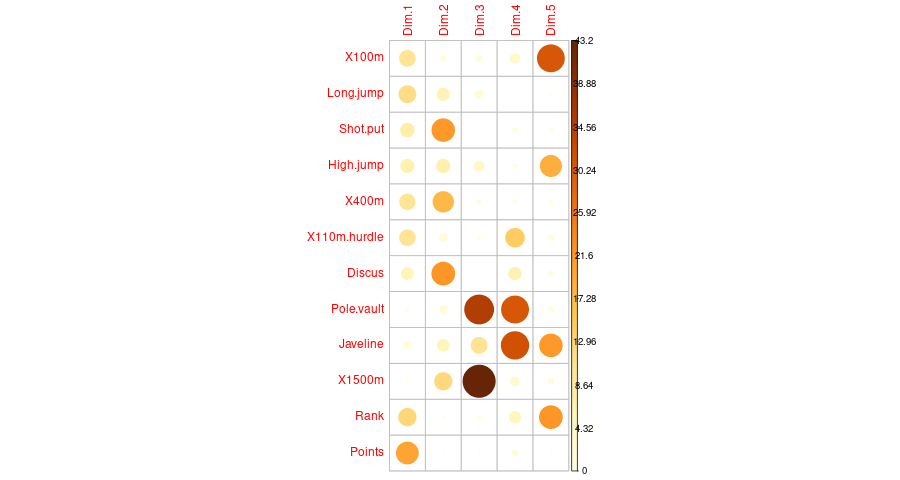

**Plot shows the top 10 variables contributing to the principal components:**

In [ ]:
# Contributions of variables to PC1
fviz_contrib(res_pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res_pca, choice = "var", axes = 2, top = 10)

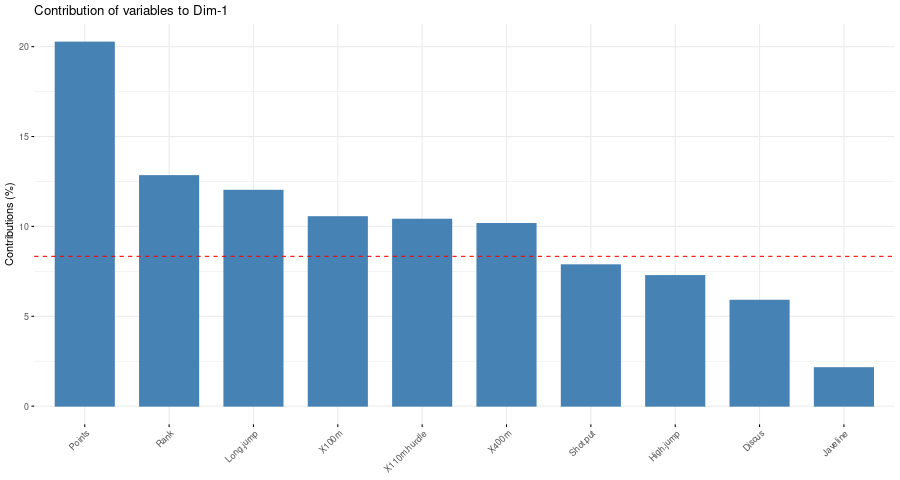

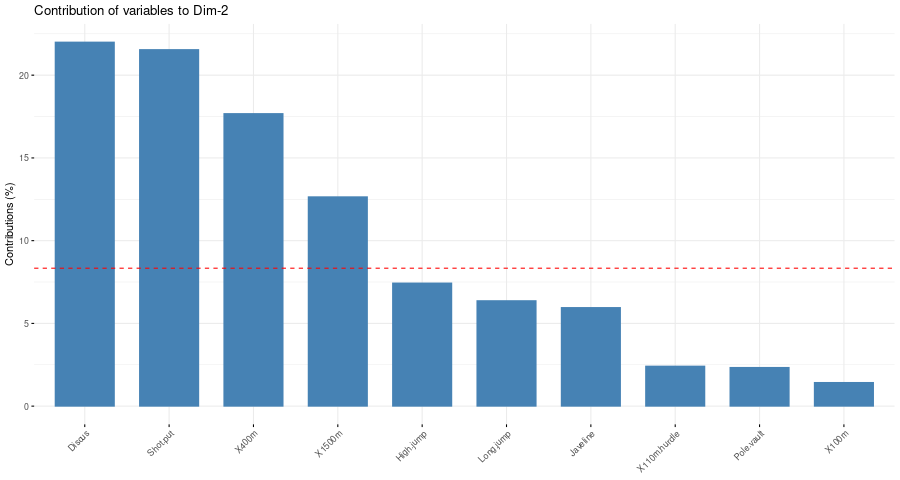

In [ ]:
fviz_contrib(res_pca, choice = "var", axes = 1:2, top = 10)

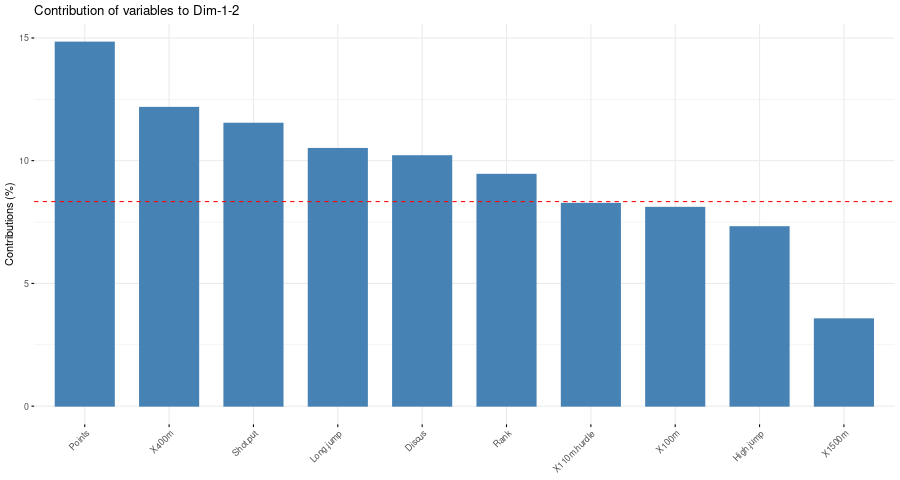

The red dashed line on the graph above indicates the expected average contribution. If the contribution of the variables were uniform, the expected value would be 1/length(variables) = 1/10 = 10%. For a given component, a variable with a contribution larger than this cutoff could be considered as important in contributing to the component.

The total contribution of a given variable, on explaining the variations retained by two principal components, say PC1 and PC2, is calculated as contrib = [(C1 * Eig1) + (C2 * Eig2)]/(Eig1 + Eig2), where

C1 and C2 are the contributions of the variable on PC1 and PC2, respectively
Eig1 and Eig2 are the eigenvalues of PC1 and PC2, respectively .Eigenvalues measure the amount of variation retained by each PC.

In this case, the expected average contribution (cutoff) is calculated as follow: 

As mentioned above, if the contributions of the 10 variables were uniform, the expected average contribution on a given PC would be 1/10 = 10%. The expected average contribution of a variable for PC1 and PC2 is : [(10* Eig1) + (10 * Eig2)]/(Eig1 + Eig2)

It can be seen that the variables - X400m, Shot put and Long Jump,Discuss - contribute the most to the dimensions 1 and 2.

**The most important (or, contributing) variables can be highlighted on the correlation plot as follow:**

In [ ]:
fviz_pca_var(res_pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

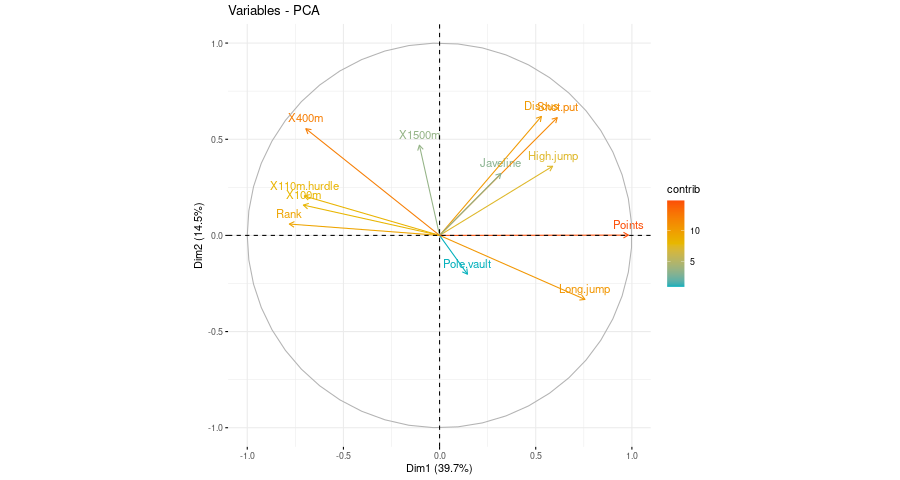

it’s also possible to change the transparency of variables according to their contrib values using the option alpha.var = "contrib". For example, type this:

In [ ]:
# Change the transparency by contrib values
fviz_pca_var(res.pca, alpha.var = "contrib")

It’s also possible to change the color of variables by groups defined by a qualitative/categorical variable, also called factor 
As we don’t have any grouping variable in our data sets for classifying variables, we’ll create it.

We start by classifying the variables into 3 groups using the kmeans clustering algorithm. Next, we use the clusters returned by the kmeans algorithm to color variables.

In [ ]:
# Create a grouping variable using kmeans
# Create 3 groups of variables (centers = 3)
set.seed(123)
res.km <- kmeans(var$coord, centers = 3, nstart = 25)
grp <- as.factor(res.km$cluster)
# Color variables by groups
fviz_pca_var(res_pca, col.var = grp, 
             palette = c("#0073C2FF", "#EFC000FF", "#868686FF"),
             legend.title = "Cluster")

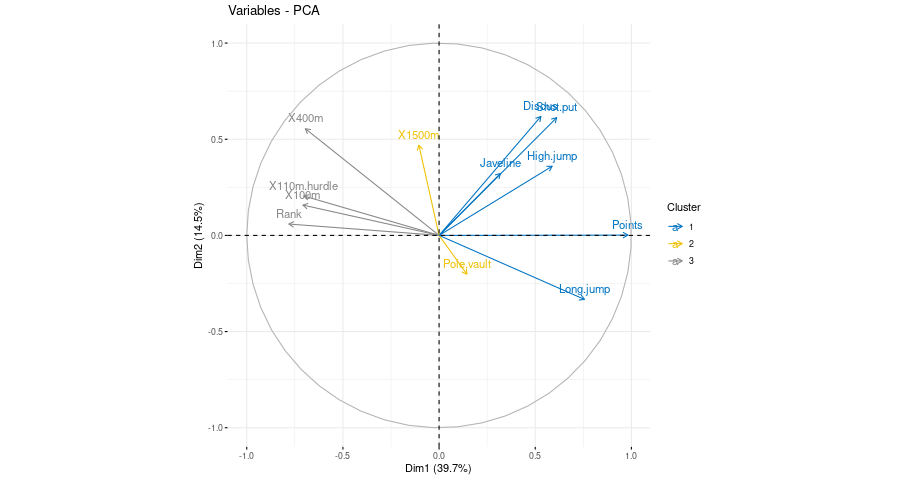

# Dimension description

**Below we describe how to highlight variables according to their contributions to the principal components.**

In [19]:
res.desc <- dimdesc(res_pca, axes = c(1,2), proba = 0.05)
# Description of dimension 1
res.desc$Dim.1

,correlation,p.value
Points,0.9816991,1.051268e-29
Long.jump,0.7559094,1.102973e-08
Shot.put,0.6116490,2.150346e-05
High.jump,0.5878896,5.307214e-05
Discus,0.5293816,3.723514e-04
Javeline,0.3189638,4.208894e-02
X400m,-0.6952784,4.540305e-07
X110m.hurdle,-0.7034326,2.906722e-07
X100m,-0.7081629,2.228788e-07
Rank,-0.7811767,1.678628e-09
